**TIME SERIES PRICE PREDICTION FOR BITCOIN**

**Introduction:** Bitcoin (BTC OR BTC-USD) is a decentralized cryptocurrency originally described in a 2008 whitepaper by a person, or group of people, using the alias Satoshi Nakamoto. It was launched soon after, in January 03, 2009. 
Bitcoin is a peer-to-peer online currency, meaning that all transactions happen directly between equal, independent network participants, without the need for any intermediary to permit or facilitate them. Bitcoin was created, according to Nakamoto’s own words, to allow “online payments to be sent directly from one party to another without going through a financial institution.”
Source: https://coinmarketcap.com/currencies/bitcoin/                                                                                                                                                           

**Objective:**  To addresse the challenges of high price volatility in cryptocurrency markets, providing investors, analysts and traders with data-driven insights for better-informed decision-making and risk management in Bitcoin trading through Predict short-term or long-term price movements in Bitcoin trading.

**Solution:** Use historical price data to train models like LSTM and Prophet to forecast future prices. 
This can be especially useful for planning entry and exit points for trades.

Data Collection: BTC open, high, low and close prices from 2014-09-17 was be obtained from the Yahoo finance library in python and stored in variable for preprocessing.

Data Exploration/Cleaning/Propressing: The obtained data was explored, cleaned, missing data checked and unwanted columns dropped, the data was scalled and ready for train_test split

Data Visualization: BTC data was visualized using matplotlib to spot trends and have a general overview of the dataset.

Data Modelling: The data was modelled using LSTM 

Data Evaluation: The performance of the models were evaluated for using key parameters for efficiency.

Deployment: The model was deployed using streamlit cloud for exploration by the public.                                                                                                                          

Import necessary libraries

In [2]:
##Ignore warmings for a cleaner notebook

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd # Data manipulation and handling
import yfinance as yf # Download historical data of the asset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Split data into train and test
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
import matplotlib.pyplot as plt # Visualization 

print(f" Libraries successfully imported")

 Libraries successfully imported


In [6]:
# Download data of the asset of interest (BTC)
ticker_symbol = "BTC-USD"
crypto_data = yf.download(ticker_symbol, start="2009-01-03", end="2024-11-17", interval="1d")

# Save the data to a CSV file
crypto_data.to_csv("crypto_data.csv")

print("Data saved to crypto_data.csv")

[*********************100%***********************]  1 of 1 completed

Data saved to crypto_data.csv


Perfrom Data Exploration/Cleaning

In [8]:
# Check data frame

crypto_data.shape

(3714, 6)

In [10]:
# Explore the first rows of the dataset

crypto_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [12]:
# Reset the index to include the first column
crypto_data = crypto_data.reset_index(drop=False)

In [14]:
crypto_data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [16]:
# Adj close price is redundant as it is same with close price

crypto_data.drop(columns=['Adj Close'], inplace=True)

In [18]:
crypto_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17 00:00:00+00:00,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,412.425995,393.181000,408.084991,26580100


In [20]:
crypto_data.columns   #Check column names and index

MultiIndex([(  'Date',        ''),
            ( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

Columns are multiindexed, hence it has to be flattened

In [22]:
# Remove multi-level structure by renaming columns
crypto_data.columns = crypto_data.columns.get_level_values(0)  # Get only the first level of the index

In [23]:
crypto_data.head()

Price,Date,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,412.425995,393.181000,408.084991,26580100


In [24]:
# Rename the columns 
crypto_data = crypto_data.rename(columns={"Price": "index"})

In [26]:
# Remove timezone information from 'Date' column
crypto_data['Date'] = crypto_data['Date'].dt.tz_localize(None)

In [28]:
crypto_data.head()

Price,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [32]:
# Assess columns data types

crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714 entries, 0 to 3713
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3714 non-null   datetime64[ns]
 1   Close   3714 non-null   float64       
 2   High    3714 non-null   float64       
 3   Low     3714 non-null   float64       
 4   Open    3714 non-null   float64       
 5   Volume  3714 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 174.2 KB


In [34]:
# Descriptive analysis

crypto_data.describe()

Price,Date,Close,High,Low,Open,Volume
count,3714,3714.000000,3714.000000,3714.000000,3714.000000,3.714000e+03
mean,2019-10-17 12:00:00,18644.868375,19044.416781,18181.068713,18621.802873,1.800343e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-04-02 06:00:00,1188.024994,1207.372498,1172.619995,1187.340027,3.392798e+08
50%,2019-10-17 12:00:00,9271.754395,9425.055664,9112.676758,9268.348633,1.431153e+10
75%,2022-05-02 18:00:00,30018.946777,30468.347168,29457.551270,29917.803223,2.900395e+10
max,2024-11-16 00:00:00,91066.007812,93434.351562,90094.226562,91064.367188,3.509679e+11
std,NaN,20527.424768,20958.726794,20022.141457,20497.498402,1.956110e+10


In [36]:
# Check for missing values

crypto_data.isnull().sum()

Price
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Cool! the dataset has no missing values

**Visualization for the dataset**

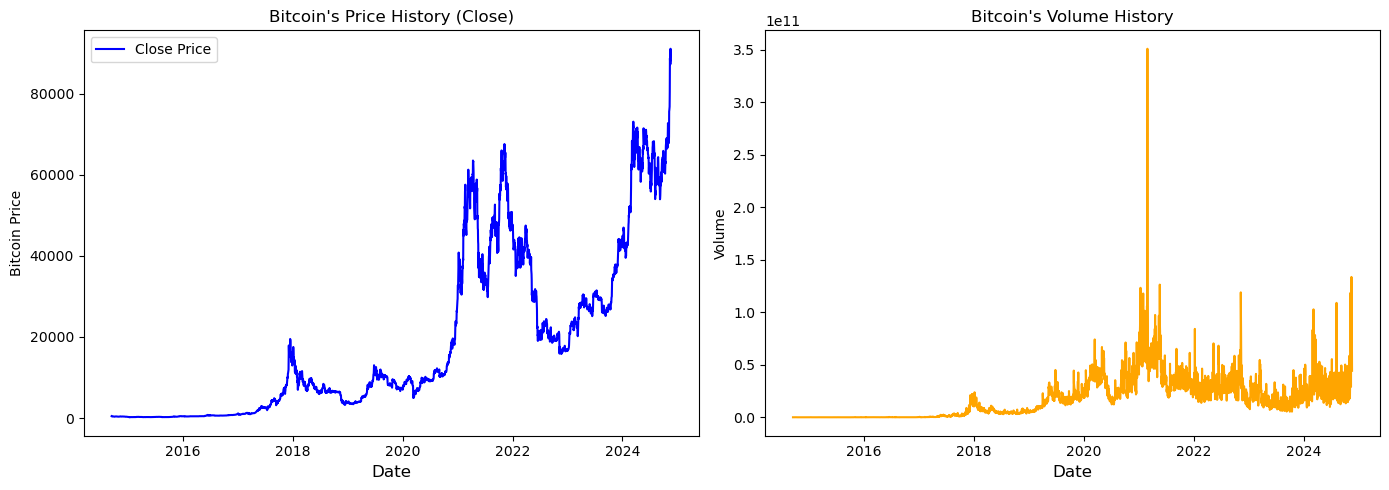

In [43]:
# Create a visualization to spot trends
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting BTC Close, High, and Low prices on ax1
ax1.plot(crypto_data["Date"], crypto_data["Close"], label="Close Price", color="blue")

ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Bitcoin Price")
ax1.set_title("Bitcoin's Price History (Close)")
ax1.legend()  # Adds a legend to distinguish the linesb

# Plotting BTC Volume on ax2
ax2.plot(crypto_data["Date"], crypto_data["Volume"], label="Volume", color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("Bitcoin's Volume History")


# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

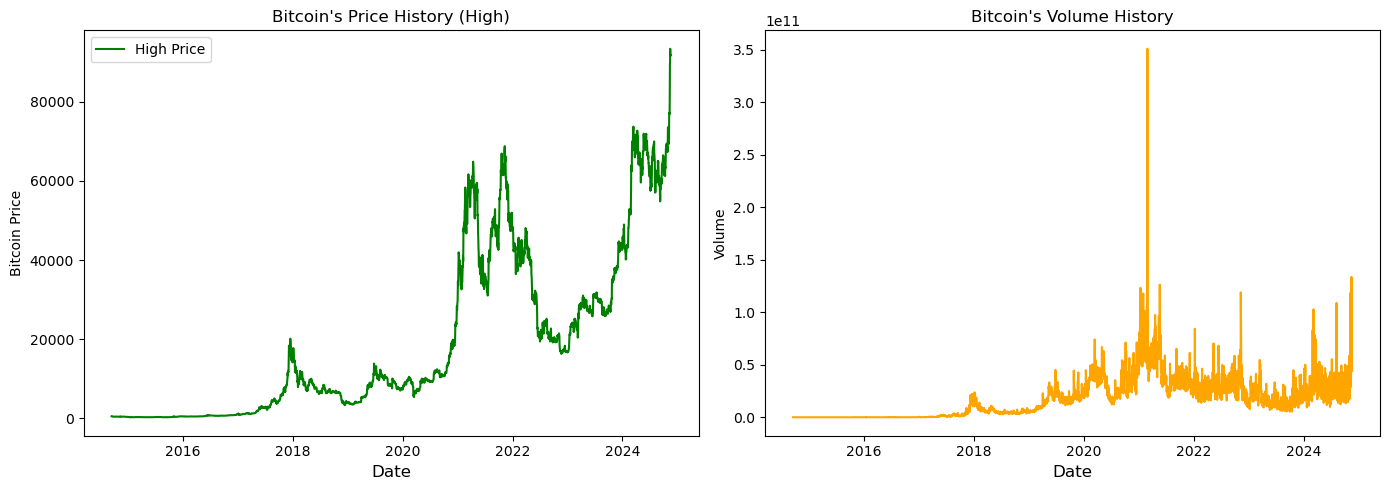

In [45]:
# Create a visualization to spot trends
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting BTC Close, High, and Low prices on ax1
ax1.plot(crypto_data["Date"], crypto_data["High"], label="High Price", color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Bitcoin Price")
ax1.set_title("Bitcoin's Price History (High)")
ax1.legend()  # Adds a legend to distinguish the lines

# Plotting BTC Volume on ax2
ax2.plot(crypto_data["Date"], crypto_data["Volume"], label="Volume", color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("Bitcoin's Volume History")


# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

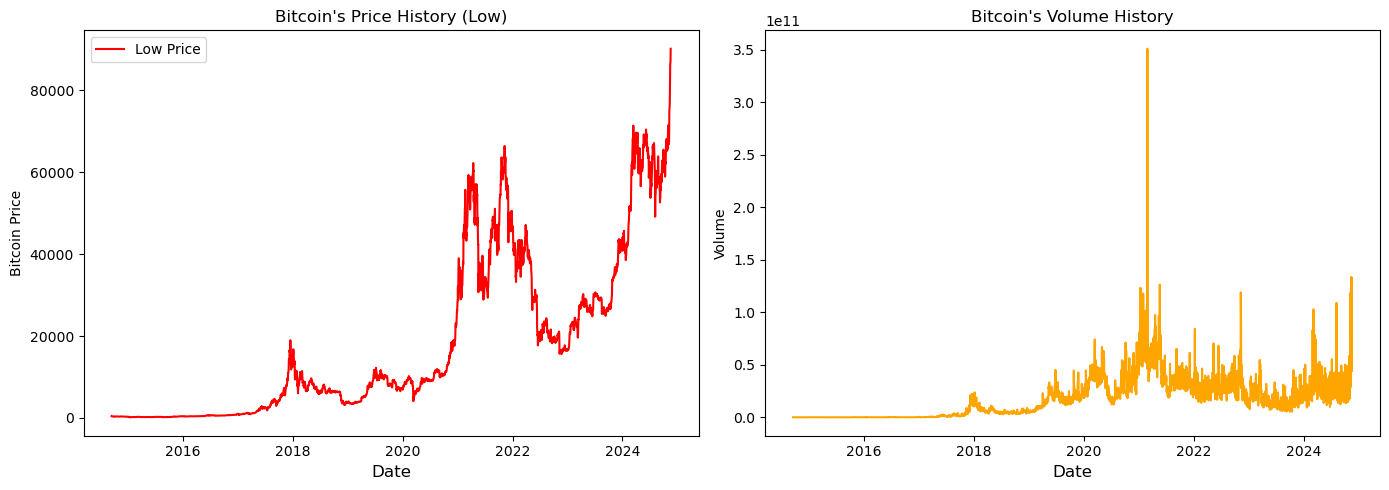

In [47]:
# Create a visualization to spot trends
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting BTC Close, High, and Low prices on ax1
ax1.plot(crypto_data["Date"], crypto_data["Low"], label="Low Price", color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Bitcoin Price")
ax1.set_title("Bitcoin's Price History (Low)")
ax1.legend()  # Adds a legend to distinguish the lines

# Plotting BTC Volume on ax2
ax2.plot(crypto_data["Date"], crypto_data["Volume"], label="Volume", color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("Bitcoin's Volume History")


# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The following can be deduced from the visualization;

1. Bitcoin hit all time high price is 2024
2. Bitcoin volume surged to an all time high in 2021(This could be attributed to the COVID-19 pandemic that encouraged earning digitally aside the 9-5)
3. There is no correlation between price and volume

**Data Preprocessing**

In [49]:
# Scale the data to be in the range [0, 1] since the price distribution is widely dispersed
scaler = MinMaxScaler(feature_range=(0, 1))
crypto_data['Close'] = scaler.fit_transform(crypto_data[['Close']])

# Create sequences for LSTM input
def create_sequences(crypto_data, seq_length=60):
    X, y = [], []
    for i in range(len(crypto_data) - seq_length):
        X.append(crypto_data[i:i + seq_length])
        y.append(crypto_data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60  # e.g., using 60 days to predict the next day
X, y = create_sequences(crypto_data['Close'].values, seq_length)

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

Train-Test Split

In [51]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

LSTM Modelling

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Import l2 regularizer
from sklearn.metrics import accuracy_score  # or any other metric you need

# Define the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False, kernel_regularizer=l2(0.001)))  # Add l2 regularizer
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 209ms/step - loss: 0.1595 - val_loss: 0.0118
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - loss: 7.9507e-04 - val_loss: 0.0016
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - loss: 4.3144e-04 - val_loss: 8.4132e-04
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - loss: 4.7752e-04 - val_loss: 5.0386e-04
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - loss: 5.4324e-04 - val_loss: 0.0011
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - loss: 3.7713e-04 - val_loss: 8.5052e-04
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - loss: 2.9174e-04 - val_loss: 9.2067e-04
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - loss: 5.7229e-04 - val_loss: 4.2042e-04
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - loss: 3.5644e-04 - val_loss: 3.9982e-04
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 3.1678e-04 

**Model Evaluation**

In [55]:
# Make predictions on the test set
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform to get actual prices

# Inverse transform y_test to get actual prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step


In [57]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predicted_prices)
mae = mean_absolute_error(y_test_actual, predicted_prices)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4322273.495416232
Mean Absolute Error: 1449.6695919010772


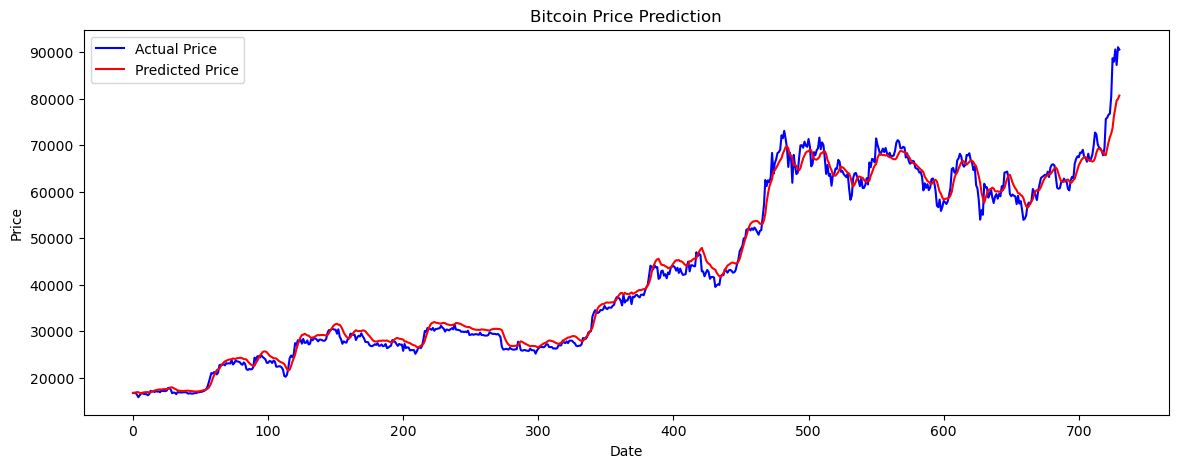

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Prices for Next 7 Days: [81035.734 79470.42  77796.55  76170.16  74683.86  73368.47  72216.95 ]


In [59]:
# Plot actual vs. predicted prices
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict future prices based on the last sequence in the dataset
last_sequence = crypto_data['Close'].values[-seq_length:]
last_sequence = last_sequence.reshape(1, -1, 1)  # Reshape for LSTM

# Generate predictions for the next 7 days
future_prices = []
for _ in range(7):
    next_price = model.predict(last_sequence)
    next_price_reshaped = np.reshape(next_price, (1, 1, -1))  # Shape: (batch_size, 1, num_features)
    future_prices.append(next_price[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_price_reshaped, axis=1)

# Inverse transform future prices
future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

# Display the predicted future prices
print("Predicted Prices for Next 7 Days:", future_prices.flatten())


In [61]:
future_prices

array([[81035.734],
       [79470.42 ],
       [77796.55 ],
       [76170.16 ],
       [74683.86 ],
       [73368.47 ],
       [72216.95 ]], dtype=float32)

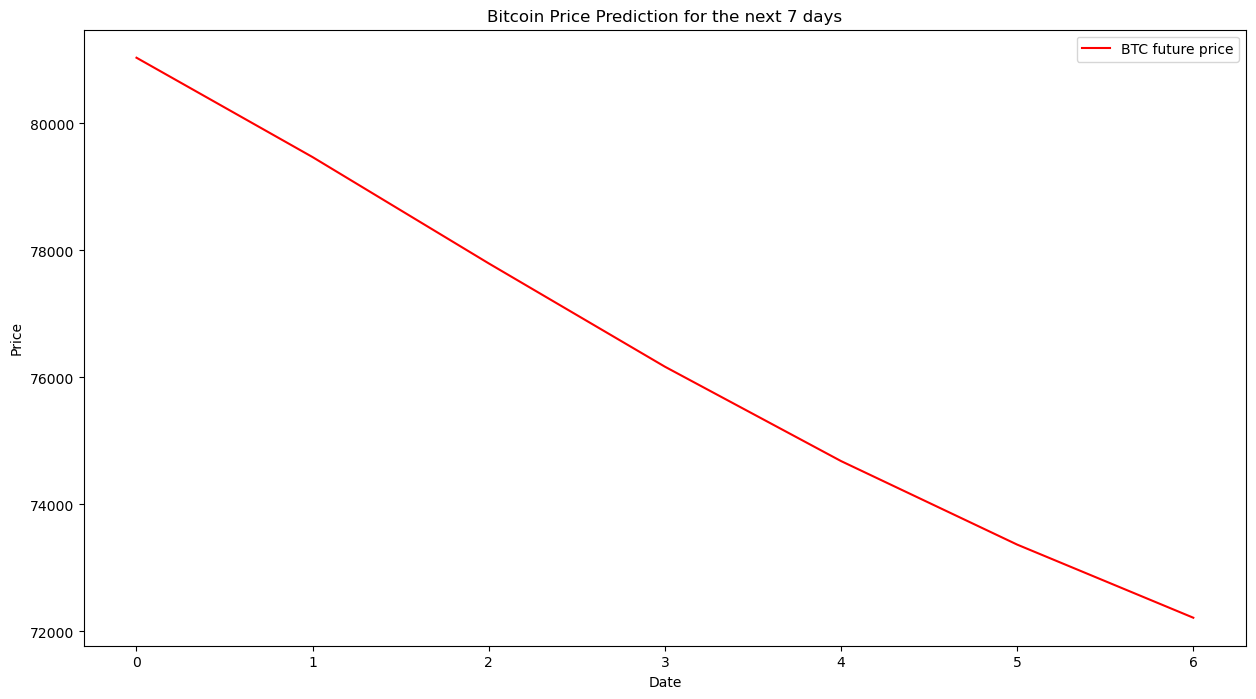

In [63]:
# Visualization for the next 7-days

plt.figure(figsize=(15, 8))
plt.plot(future_prices, color='red', label='BTC future price')
plt.title('Bitcoin Price Prediction for the next 7 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



**Saving My Model**

In [68]:
import joblib

In [72]:
#Save the model
joblib.dump(model, 'btcpriceforecast.h5')

['btcpriceforecast.h5']

In [76]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [74]:
# Create the file Expresso_Churn_Prediction_Streamlit_App.py in write mode
with open("btcpriceprediction.py", "w") as file:
    # Writing the Streamlit code into the file
    file.write("""
import streamlit as st
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('btcpriceforecast.h5')  # Make sure to save your model as 'your_model.h5'

# Function to fetch and preprocess data
def fetch_data():
    ticker_symbol = "BTC-USD"
    crypto_data = yf.download(ticker_symbol, start="2009-01-03", end="2024-11-17", interval="1d")
    return crypto_data

# Function to make predictions
def predict_future_prices(data, model, days=7):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
    
    last_sequence = scaled_data[-60:].reshape(1, -1, 1)  # Reshape for LSTM
    future_prices = []
    
    for _ in range(days):
        next_price = model.predict(last_sequence)
        future_prices.append(next_price[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_price.reshape(1, 1, 1), axis=1)

    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))
    return future_prices.flatten()

# Streamlit UI
st.title("Bitcoin Price Prediction")
st.write("Predict future Bitcoin prices using LSTM model.")

# Fetch data
data = fetch_data()

# Show the latest data
st.subheader("Latest Bitcoin Data")
st.write(data.tail())

# Prediction
if st.button('Predict Next 7 Days'):
    future_prices = predict_future_prices(data, model)
    st.subheader("Predicted Prices for Next 7 Days")
    st.write(future_prices)

    # Plotting the future prices
    plt.figure(figsize=(10, 5))
    plt.plot(future_prices, marker='o', color='red', label='Predicted Price')
    plt.title('Bitcoin Price Prediction for the Next 7 Days')
    plt.xlabel('Days')
    plt.ylabel('Price in USD')
    plt.legend()
    st.pyplot(plt)   
""")